In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cargamos los datasets

# gases de efecto invernadero
emisiones=pd.read_csv('Datasets/Emisiones de gases de efecto invernadero totales/efecto_invernadero.csv')

# área selvática
area_selvatica=pd.read_csv('Datasets/╡rea selvática/area_selvatica.csv')

# crecimiento poblacional 
crecimiento_poblacional=pd.read_csv('Datasets/Crecimiento de la población Urbana/crecimiento_poblacional.csv')

In [3]:
emisiones

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,NaN,AFE,838050,948360,1342560,1381860,1406900,1436410,1436770,1457530,1471620,1478910,..,..
1,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,NaN,AFW,398170,553740,723970,740720,771100,790820,805370,835230,848650,881570,..,..
2,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,El mundo árabe,ARB,985720,1380740,2174340,2285760,2318020,2395260,2438650,2479110,2518170,2538650,..,..
3,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,Estados pequeos del Caribe,CSS,44920,44910,56360,58520,57700,57020,56680,53830,53410,55020,..,..
4,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,Europa Central y del Báltico,CEB,1280490,916490,902300,873260,845980,825390,837450,847240,870180,864510,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from Database: Indicadores del desarrollo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# De acuerdo con la previsualización del dataframe, los años 2019 y 2020 no tienen datos. Comprobemos qué datos únicos tienen:

emisiones.iloc[:266][['2019 [YR2019]', '2020 [YR2020]']].value_counts()

2019 [YR2019]  2020 [YR2020]
..             ..               266
dtype: int64

In [5]:
# Efectivamente, no hay datos para 2019 y 2020, por lo que omitimos estas columnas para nuestro análisis

# Las primeras 2 columnas solo indican el nombre y código de la serie (el cual siempre es el mismo), por lo tanto lo omitimos para facilitar la visualización.
valid_columns = emisiones.keys()[2:-2]

emisiones = emisiones.iloc[:266][valid_columns]

In [6]:
# Es de esperarse que no haya datos para todos los años de cada país.
# Eliminaremos los paises que no tengan datos para más de 2 años.

# Pero antes reemplacemos los valores faltantes representados por '..' por NaN.
emisiones = emisiones.replace('..', np.nan)

# Tomamos solo las columnas con datos numéricos para verificar los Nan
values_columns = emisiones.keys()[2:]

emisiones = emisiones[emisiones[values_columns].isnull().sum(axis=1) < 3]

for col in emisiones.columns[2:]:
    emisiones[col] = emisiones[col].astype('float64')

In [7]:
# Vemos que en el dataset se incluyen distintas regiones geopolíticas: mundo entero, continentes, grupos de países, organizaciones, países, etc.
# Debemos de separar manualmente los datos de cada una de las regiones.

# Veamos la lista entera de regiones y países

emisiones['Country Name'].unique()

array([nan, 'El mundo árabe', 'Estados pequeos del Caribe',
       'Europa Central y del Báltico',
       'inicial del dividendo demográfico', 'Asia oriental y el Pacífico',
       'Asia oriental y el Pacífico (excluido altos ingresos)',
       'Asia oriental y el Pacífico (BIRF y la AIF)', 'Zona del Euro',
       'Europa y Asia central',
       'Europa y Asia central (excluido altos ingresos)',
       'Europa y Asia central (BIRF y la AIF)', 'Unión Europea',
       'Frágiles y situaciones de conflicto afectados',
       'Países pobres muy endeudados (PPME)', 'Ingreso alto', 'Sólo BIRF',
       'BIRF y la AIF', 'mezcla de la AIF', 'Sólo AIF', 'total de la AIF',
       'avanzada del dividendo demográfico', 'América Latina y el Caribe',
       'América Latina y el Caribe (excluido altos ingresos)',
       'América Latina y el Caribe (BIRF y la AIF)',
       'Países menos desarrollados: clasificación de las Naciones Unidas',
       'Ingreso mediano y bajo', 'Países de ingreso bajo',
     

In [8]:
# Dividimos el dataset en uno de país y otro de regiones
# Afganistán es el primer país de la lista

pos_afganistan = emisiones[emisiones['Country Name']=='Afganistán'].index[0]

emision_region = emisiones.iloc[:pos_afganistan-2]
emision_pais = emisiones.iloc[pos_afganistan-1:]

# Reemplazamos los valores faltantes por la media de los datos de ese año
emision_pais[values_columns] = emision_pais[values_columns].fillna(emision_pais[values_columns].mean())

emision_pais

/home/cs/anaconda3/envs/MLTF/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
49,Afganistán,AFG,15180.0,15080.0,58650.0,66750.0,74800.0,84620.0,93730.0,95370.0,97300.0,98920.0
50,Albania,ALB,11310.0,8220.0,9630.0,9240.0,9440.0,9930.0,9850.0,9720.0,10290.0,10080.0
51,Argelia,DZA,95010.0,126380.0,179950.0,189820.0,194000.0,204130.0,212080.0,209790.0,211850.0,218910.0
53,Andorra,AND,430.0,590.0,600.0,600.0,590.0,580.0,580.0,590.0,590.0,590.0
54,Angola,AGO,42180.0,49590.0,86040.0,84930.0,88410.0,88980.0,90620.0,91240.0,87180.0,79730.0
...,...,...,...,...,...,...,...,...,...,...,...,...
259,Venezuela,VEN,179990.0,228000.0,259660.0,279300.0,284140.0,285460.0,270980.0,257600.0,243570.0,233920.0
260,Viet Nam,VNM,72550.0,134560.0,257880.0,258290.0,268770.0,283000.0,327320.0,341580.0,340420.0,376530.0
263,"Yemen, Rep. del",YEM,12370.0,22250.0,32390.0,31470.0,38350.0,38810.0,26050.0,22740.0,21970.0,21760.0
264,Zambia,ZMB,45340.0,25680.0,32210.0,36130.0,37220.0,37680.0,38840.0,39100.0,39670.0,40670.0


Realizando una exploración de los datos básica se concluye que se ha de realizar una limpieza. De la fila 266 en adelante se tiene filas completamente vacías, las cuales se proceden a eliminar. También se eliminan las filas correspondientes a los años 2019 y 2020 pues estaban vacías. Se descartan las columnas 'Series name' y 'Series code' ya que no aportan información relevante.

30.0 235510.0


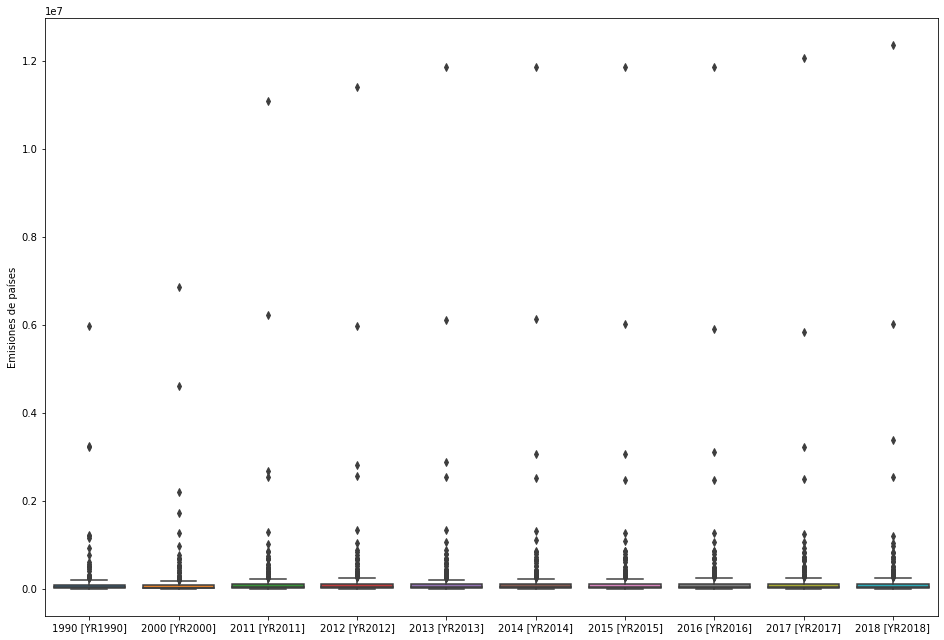

In [9]:
from matplotlib.cbook import boxplot_stats

plt.figure(figsize=(16,11))
plt.ylabel('Emisiones de países')
box_plot = sns.boxplot(data=emision_pais, orient= 'v')

low_whisker = boxplot_stats(emision_pais['2018 [YR2018]'])[0]['whislo']
high_whisker = boxplot_stats(emision_pais['2018 [YR2018]'])[0]['whishi']

print(low_whisker, high_whisker)

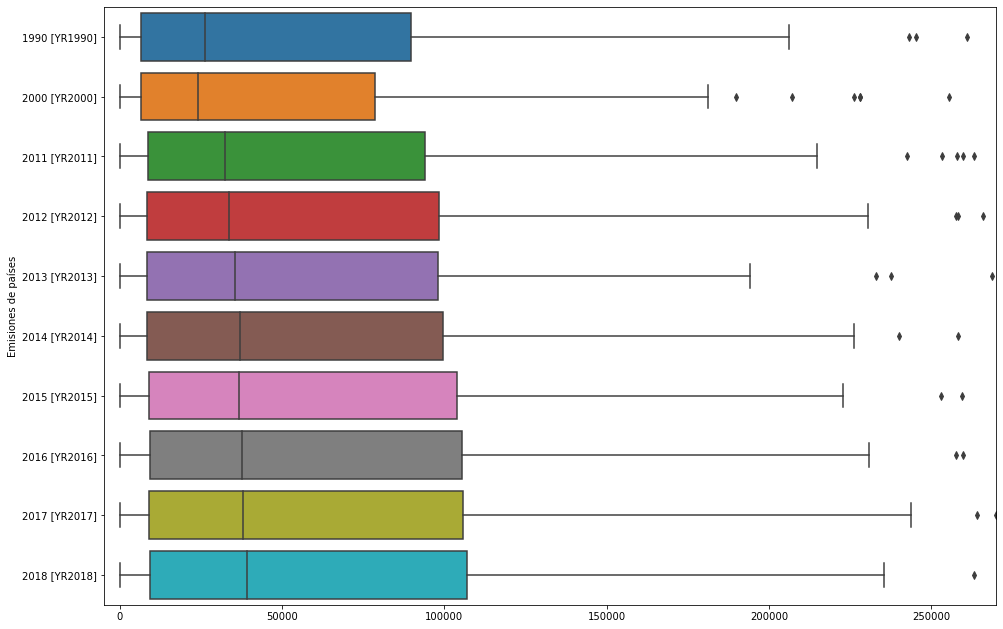

In [10]:
# La cota inferior para valores atípicos corresponde con el valor mínimo minimo del dataset, entonces solo excluimos con el bigote superior.
emision_pais_filtrado = emision_pais[emision_pais['2018 [YR2018]'] < high_whisker]

# Redifinimos los índices en el nuevo dataframe para poder ubicar de acuerdo a estos
emision_pais_filtrado.reset_index(drop=True, inplace=True)

# Veamos el gráfico más de cerca excluyendo la mayoría de los datos atípicos.

plt.figure(figsize=(16,11))
plt.ylabel('Emisiones de países')
plt.xlim(-5000, 270000)
box_plot = sns.boxplot(data=emision_pais, orient= 'h')

In [11]:
min_emision = emision_pais_filtrado.iloc[emision_pais_filtrado[values_columns].mean(axis=1).sort_values(ascending=True).index[0:9]]
max_emision = emision_pais_filtrado.iloc[emision_pais_filtrado[values_columns].mean(axis=1).sort_values(ascending=False).index[0:9]]

emision_pais_filtrado[values_columns].mean(axis=1).sort_values(ascending=True)

151        23.0
103        71.0
74         83.0
123       158.0
84        208.0
         ...   
68     167873.0
117    180172.0
2      184192.0
105    189282.0
155    252262.0
Length: 159, dtype: float64

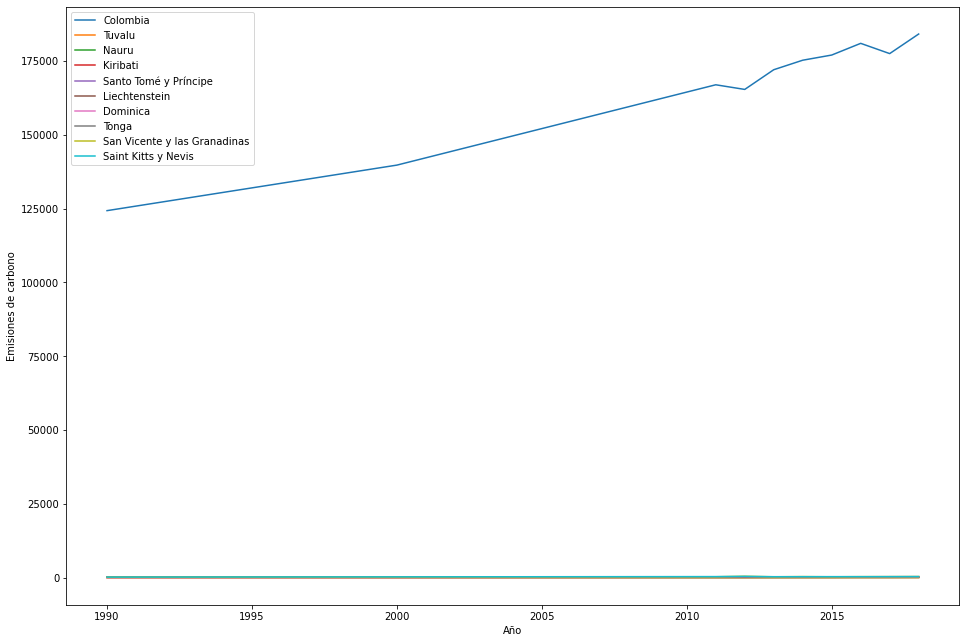

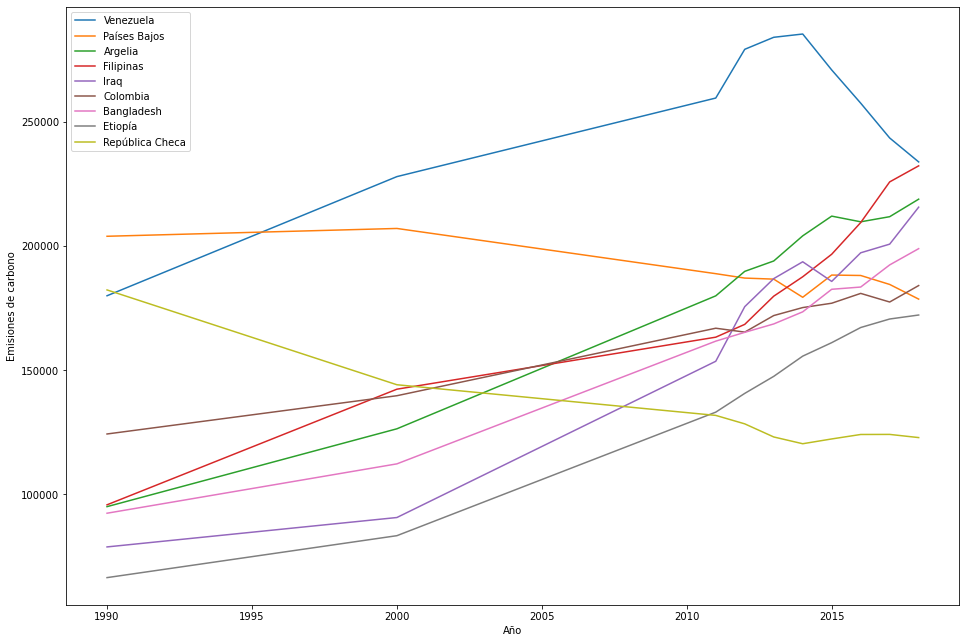

In [12]:
yrs = [1990, 2000, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

plt.figure(figsize=(16,11))
plt.xlabel('Año')
plt.ylabel('Emisiones de carbono')


plt.plot(yrs, emision_pais_filtrado[emision_pais_filtrado['Country Name']=='Colombia'][values_columns].T, label='Colombia')
for i in min_emision['Country Name']:
    plt.plot(yrs, min_emision[min_emision['Country Name'] == i][values_columns].T,label = i)

plt.legend()

plt.figure(figsize=(16,11))

plt.xlabel('Año')
plt.ylabel('Emisiones de carbono')

for i in max_emision['Country Name']:
    plt.plot(yrs, max_emision[max_emision['Country Name'] == i][values_columns].T,label = i)

plt.legend()

In [13]:
# Calculemos la media de emisiones para los paices seleccionados en cada año
emision_pais_filtrado[values_columns].mean()


1990 [YR1990]    35489.698651
2000 [YR2000]    32693.836478
2011 [YR2011]    39246.289308
2012 [YR2012]    39955.031447
2013 [YR2013]    40226.477987
2014 [YR2014]    40590.691824
2015 [YR2015]    41218.238994
2016 [YR2016]    41906.855346
2017 [YR2017]    42332.389937
2018 [YR2018]    42662.264151
dtype: float64

In [14]:
# Ahora se procede a calcular la diferencia entre las emisiones en Colombia entre el año 2000 y 2018


emision_pais_filtrado[emision_pais_filtrado['Country Name']=='Colombia']


,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
31,Colombia,COL,124290.0,139710.0,166910.0,165340.0,172010.0,175230.0,176980.0,180940.0,177470.0,184100.0


In [15]:
# Ahora que vimos en que posición se encuentra Colombia procedamos a calcular la diferencia entre las emisiones

e_2000=emision_pais_filtrado['2000 [YR2000]'].loc[91]
e_2018=emision_pais_filtrado['2018 [YR2018]'].loc[91]

print(f'La diferencia de las emisiones en Colombia entre los años 2000 y  2018 es de {e_2018-e_2000}, es decir, las emisiones aumentarón en un {np.round(100*(e_2018-e_2000)/e_2000,2)}% ')

La diferencia de las emisiones en Colombia entre los años 2000 y  2018 es de -370.0, es decir, las emisiones aumentarón en un -15.35% 


In [16]:
# Ampliemos el dataset filtrado utilizando los datasets de área selvática y crecimiento poblacional.
#Primero revisemos los datasets para ver si necesitan ser limpiados 

area_selvatica

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,NaN,AFE,4988232.4,5058895.14,4765400.98,4734211.36,4703021.74,4671832.12,4640642.5,4607876.1,4575901.2,4544314.78,4511676.2,4479395
1,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,NaN,AFW,2060349,1953461.84,1862169.28,1854212.96,1846256.64,1838300.32,1830344,1822960.7789,1815608.1,1807898.6,1800220.1,1792580.7
2,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,El mundo árabe,ARB,200673.068999237,411781.7,389730.660000763,387305.120000763,384879.580000763,382454.040000763,380038.2,377730.6,375191.7,372634.1,370302.7,367980.7
3,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,Estados pequeos del Caribe,CSS,369972.4,367737.7,366230.12,365932.84,365635.56,365338.28,365041,364757.9,364515.3,364223.4,363931.1,363639.2
4,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,Europa Central y del Báltico,CEB,353069,358777.6,373931.3,375384.4,376837.5,378290.6,379743.7,380336.502,380939.984,381258,381574.9,381881.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from Database: Indicadores del desarrollo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
area_selvatica[area_selvatica['Country Name'].isin(emision_pais['Country Name'])]

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
49,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,Afganistán,AFG,12084.4,12084.4,12084.4,12084.4,12084.4,12084.4,12084.4,12084.4,12084.4,12084.4,12084.4,12084.4
50,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,Albania,ALB,7888,7693,7834.935,7849.17,7863.405,7877.64,7891.875,7891.8,7889.025,7889,7889,7889
51,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,Argelia,DZA,16670,15790,19256,19332,19408,19484,19560,19560,19430,19300,19390,19490
53,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,Andorra,AND,160,160,160,160,160,160,160,160,160,160,160,160
54,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,Angola,AGO,792627.8,777086.1,716029.38,710478.76,704928.14,699377.52,693826.9,688276.2,682725.7,677175.1,671624.4,666073.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,Venezuela,VEN,520260,491510,473406,471762,470118,468474,466830,465432.6,464281.8,463377.6,462720,462309
260,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,Viet Nam,VNM,93759.6,117841,135228.2,136575.8,137923.4,139271,140618.6,143776.8,144153.9,144912.9,145671.9,146430.9
263,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,"Yemen, Rep. del",YEM,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490,5490
264,Área selvática (kilómetros cuadrados),AG.LND.FRST.K2,Zambia,ZMB,474120,470540,465078.2,463196.4,461314.6,459432.8,457551,455668,453786.7,451904.6,450022.4,448140.3


In [25]:
area_selvatica['Country Name'].isin(emision_pais_filtrado['Country Name'])

0      False
1      False
2      False
3      False
4      False
       ...  
266    False
267    False
268    False
269    False
270    False
Name: Country Name, Length: 271, dtype: bool